In [1]:
from IPython.core.display import display,HTML

In [2]:
HTML('''<script>
    hideInput = () => $('div.input').hide();
</script>
<body onload="javascript:hideInput()"></body>''')

In [3]:
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

# Assignment 5

Link to questions - [here](https://docs.google.com/document/d/1uxL1_4wc5FeR7bc67N9hbRyu24FeNoiwbb4mg5Eicfw/edit?usp=sharing)

***Student Details:***

- Name : Anjishnu Mukherjee
- Registration Number : B05-511017020
- Class Roll Number : CS Gy-70
- Exam Roll Number : 510517086
- Email : 511017020.anjishnu@students.iiests.ac.in

# Project Setup

### Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


### Load libraries, set seed

In [ ]:
%%capture
import platform
import random
import os
import sys
from collections import OrderedDict  
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import RandomFourierFeatures
import json
import cv2

def get_lib_versions():
  print("------------------------------------")
  output = OrderedDict()
  output["OS"] = platform.platform()
  output["Python version"] = sys.version.replace("\n", " ")
  output["Numpy version"] = np.version.full_version
  output["Pandas version"] = pd.__version__
  output["Matplotlib version"] = matplotlib.__version__
  output["Seaborn version"] = sns.__version__
  output["Scikitlearn version"] = sklearn.__version__
  for kv in output.items():
    print("%s: %s" % kv)
  print("------------------------------------")

def fix_seeds(seed=1337):
  SEED = seed
  random.seed(SEED)
  os.environ['PYTHONHASHSEED'] = str(SEED)
  np.random.seed(SEED)
  plt.rcParams['figure.figsize'] = (7.0, 7.0) 
  plt.rcParams['figure.dpi'] = 90  
  sns.set_style("dark")
  sns.set_context("paper")
  sns.set_palette("colorblind")
  print("Global Seed : ", SEED)
  print("------------------------------------")

In [ ]:
print("Environment Information : ")
get_lib_versions()
fix_seeds(5 )

Environment Information : 
------------------------------------
OS: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python version: 3.6.9 (default, Jul 17 2020, 12:50:27)  [GCC 8.4.0]
Numpy version: 1.18.5
Pandas version: 1.1.2
Matplotlib version: 3.2.2
Seaborn version: 0.11.0
Scikitlearn version: 0.22.2.post1
------------------------------------
Global Seed :  5
------------------------------------


# Data Loading

## Prepare the data


### Load MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

### Train:Test split

In [ ]:
train_ratio = 0.90

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1 - train_ratio, random_state = 5, shuffle = True)

print("------------------------------------")
print("The shapes of the different data : ")
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)
print("------------------------------------")

------------------------------------
The shapes of the different data : 
x train:  (63000, 28, 28)
x test:  (7000, 28, 28)
y train:  (63000,)
y test:  (7000,)
------------------------------------


### Pre-process data by flattening and scaling it

In [ ]:
x_train = x_train.reshape(-1, 784).astype("float32") / 255
x_test = x_test.reshape(-1, 784).astype("float32") / 255

### Categorical (one hot) encoding of the labels

In [ ]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

## Prepare all models

***NOTE :*** <br> ```28*28 = 784``` <br> ```32*32 = 1024``` 


for the resizing to 32*32 part, see [this](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures).

### Model 1

In [ ]:
model1 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Activation('sigmoid'),
        layers.Dense(10),
        layers.Activation('softmax')

    ]
)
model1.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features (Ran (None, 1024)              803841    
_________________________________________________________________
dense (Dense)                (None, 16)                16400     
_________________________________________________________________
activation (Activation)      (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 820,411
Trainable params: 16,570
Non-trainable params: 803,841
_________________________________________________________________
None


### Model 2

In [ ]:
model2 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Activation('sigmoid'),
        layers.Dense(32),
        layers.Activation('sigmoid'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model2.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_1 (R (None, 1024)              803841    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                16400     
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
_________________________________________________________________
activation_4 (Activation)    (None, 10)               

### Model 3

In [ ]:
model3 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Activation('sigmoid'),
        layers.Dense(32),
        layers.Activation('sigmoid'),
        layers.Dense(64),
        layers.Activation('sigmoid'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model3.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model3.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_2 (R (None, 1024)              803841    
_________________________________________________________________
dense_5 (Dense)              (None, 16)                16400     
_________________________________________________________________
activation_5 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
activation_6 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                2112      
_________________________________________________________________
activation_7 (Activation)    (None, 64)               

### Model 4

In [ ]:
model4 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Activation('sigmoid'),
        layers.Dense(32),
        layers.Activation('sigmoid'),
        layers.Dense(64),
        layers.Activation('sigmoid'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model4.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model4.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_3 (R (None, 1024)              803841    
_________________________________________________________________
dense_9 (Dense)              (None, 16)                16400     
_________________________________________________________________
activation_9 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
activation_10 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_11 (Activation)   (None, 64)               

### Model 5

In [ ]:
model5 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Activation('tanh'),
        layers.Dense(32),
        layers.Activation('tanh'),
        layers.Dense(64),
        layers.Activation('tanh'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model5.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model5.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_4 (R (None, 1024)              803841    
_________________________________________________________________
dense_13 (Dense)             (None, 16)                16400     
_________________________________________________________________
activation_13 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                544       
_________________________________________________________________
activation_14 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_15 (Activation)   (None, 64)               

### Model 6

In [ ]:
model6 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model6.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model6.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_5 (R (None, 1024)              803841    
_________________________________________________________________
dense_17 (Dense)             (None, 16)                16400     
_________________________________________________________________
activation_17 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)                544       
_________________________________________________________________
activation_18 (Activation)   (None, 32)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 64)                2112      
_________________________________________________________________
activation_19 (Activation)   (None, 64)               

### Model 7

In [ ]:
model7 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.9),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.9),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.9),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model7.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model7.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_6 (R (None, 1024)              803841    
_________________________________________________________________
dense_21 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
activation_21 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
activation_22 (Activation)   (None, 32)               

### Model 8

In [ ]:
model8 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.75),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.75),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.75),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model8.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model8.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_7 (R (None, 1024)              803841    
_________________________________________________________________
dense_25 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
activation_25 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
activation_26 (Activation)   (None, 32)               

### Model 9

In [ ]:
model9 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.5),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.5),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.5),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model9.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model9.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_8 (R (None, 1024)              803841    
_________________________________________________________________
dense_29 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
activation_29 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_30 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
activation_30 (Activation)   (None, 32)               

### Model 10

In [ ]:
model10 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.25),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.25),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.25),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model10.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model10.summary())

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_9 (R (None, 1024)              803841    
_________________________________________________________________
dense_33 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_9 (Dropout)          (None, 16)                0         
_________________________________________________________________
activation_33 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_34 (Activation)   (None, 32)               

### Model 11

In [ ]:
model11 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model11.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model11.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_10 ( (None, 1024)              803841    
_________________________________________________________________
dense_37 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
activation_37 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_38 (Activation)   (None, 32)              

# Hyper-parameter search and Model Training

## Run the models and plot graphs

***NOTE :*** For the graphs drawn for test accuracy, refer this [Stackoverflow answer](https://stackoverflow.com/a/53078430/11009359).

For the first layer after input of all the models, see [this](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/RandomFourierFeatures)

In [ ]:
def plot_history(history):
    N = len(history.history["loss"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
    plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
    plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
    plt.title("Loss and Accuracy vs Epoch on Dataset")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend(loc="lower left")
    return

def plot_test(history):
    N = len(history.history["loss"])
    plt.figure()
    plt.plot(np.arange(0, N), history.history["val_acc"], label="test_acc")
    plt.title("Test Accuracy vs Epoch")
    plt.xlabel("Epoch #")
    plt.ylabel("Test Accuracy")
    plt.legend(loc="lower left")
    return

### Model 1

Epoch 1/5
443/443 [==============================] - 4s 8ms/step - loss: 1.0754 - acc: 0.7965 - val_loss: 0.6146 - val_acc: 0.8921
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 0.4580 - acc: 0.9102 - val_loss: 0.3600 - val_acc: 0.9205
Epoch 3/5
443/443 [==============================] - 3s 8ms/step - loss: 0.3066 - acc: 0.9302 - val_loss: 0.2753 - val_acc: 0.9349
Epoch 4/5
443/443 [==============================] - 3s 8ms/step - loss: 0.2417 - acc: 0.9405 - val_loss: 0.2312 - val_acc: 0.9432
Epoch 5/5
443/443 [==============================] - 3s 8ms/step - loss: 0.2038 - acc: 0.9478 - val_loss: 0.2053 - val_acc: 0.9498


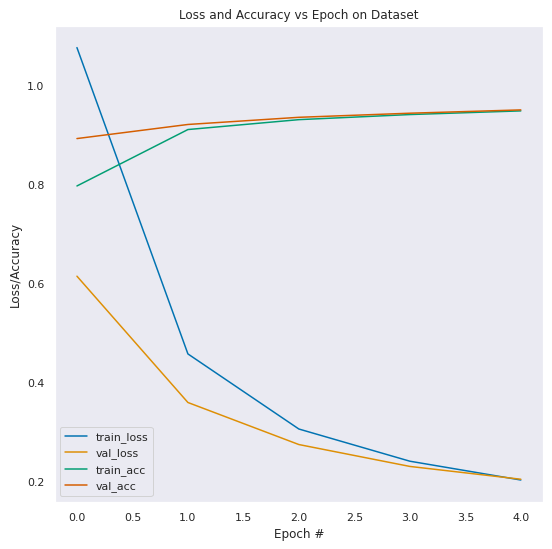

In [ ]:
history_train_val = model1.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

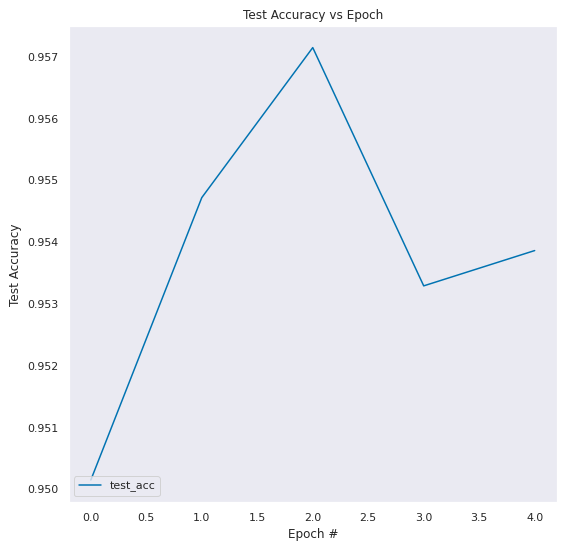

In [ ]:
history_test = model1.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### Model 2

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 1.5672 - acc: 0.6209 - val_loss: 0.9124 - val_acc: 0.8360
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 0.6173 - acc: 0.8829 - val_loss: 0.4275 - val_acc: 0.9078
Epoch 3/5
443/443 [==============================] - 4s 8ms/step - loss: 0.3372 - acc: 0.9226 - val_loss: 0.2852 - val_acc: 0.9281
Epoch 4/5
443/443 [==============================] - 3s 8ms/step - loss: 0.2421 - acc: 0.9384 - val_loss: 0.2322 - val_acc: 0.9373
Epoch 5/5
443/443 [==============================] - 4s 8ms/step - loss: 0.1977 - acc: 0.9471 - val_loss: 0.2096 - val_acc: 0.9449


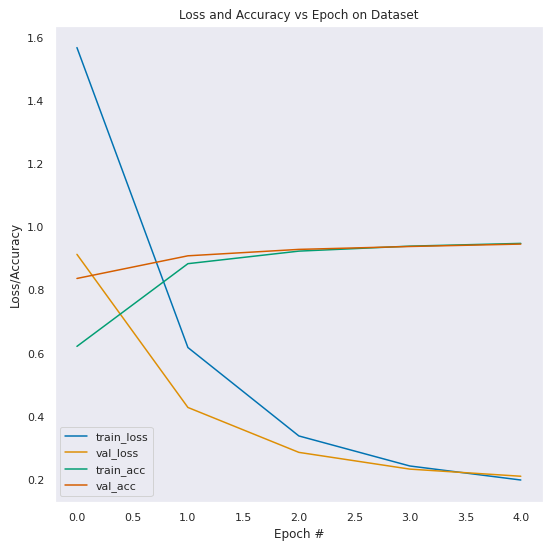

In [ ]:
history_train_val = model2.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

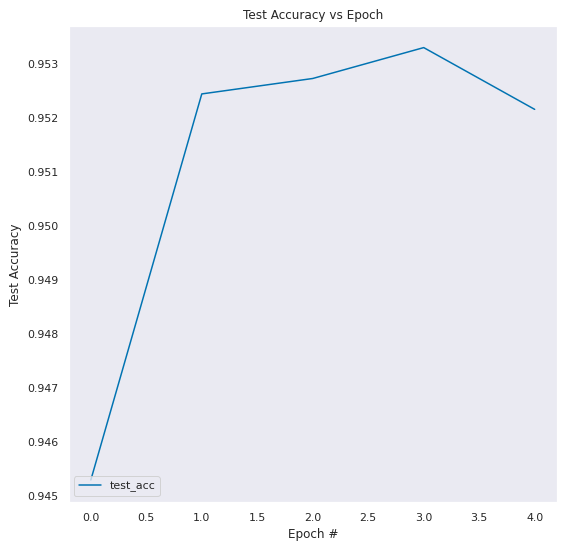

In [ ]:
history_test = model2.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### Model 3

Epoch 1/5
443/443 [==============================] - 4s 8ms/step - loss: 1.6498 - acc: 0.5017 - val_loss: 0.9293 - val_acc: 0.7633
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 0.6343 - acc: 0.8468 - val_loss: 0.4194 - val_acc: 0.9033
Epoch 3/5
443/443 [==============================] - 4s 8ms/step - loss: 0.3206 - acc: 0.9206 - val_loss: 0.2801 - val_acc: 0.9271
Epoch 4/5
443/443 [==============================] - 4s 8ms/step - loss: 0.2385 - acc: 0.9367 - val_loss: 0.2422 - val_acc: 0.9363
Epoch 5/5
443/443 [==============================] - 4s 8ms/step - loss: 0.1973 - acc: 0.9449 - val_loss: 0.2187 - val_acc: 0.9394


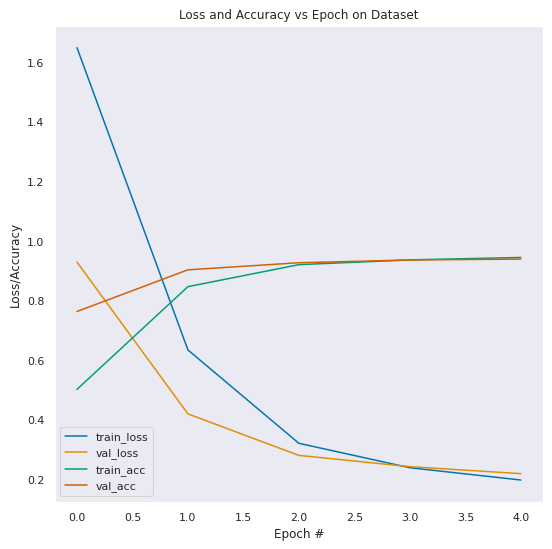

In [ ]:
history_train_val = model3.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

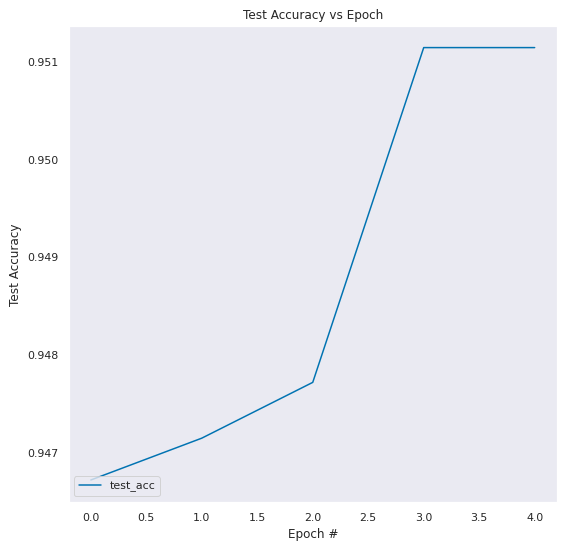

In [ ]:
history_test = model3.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### Model 4

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 1.5651 - acc: 0.5369 - val_loss: 0.8281 - val_acc: 0.7675
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 0.5657 - acc: 0.8637 - val_loss: 0.3854 - val_acc: 0.9063
Epoch 3/5
443/443 [==============================] - 4s 9ms/step - loss: 0.3153 - acc: 0.9211 - val_loss: 0.2855 - val_acc: 0.9216
Epoch 4/5
443/443 [==============================] - 4s 8ms/step - loss: 0.2452 - acc: 0.9340 - val_loss: 0.2455 - val_acc: 0.9297
Epoch 5/5
443/443 [==============================] - 4s 8ms/step - loss: 0.2073 - acc: 0.9432 - val_loss: 0.2436 - val_acc: 0.9294


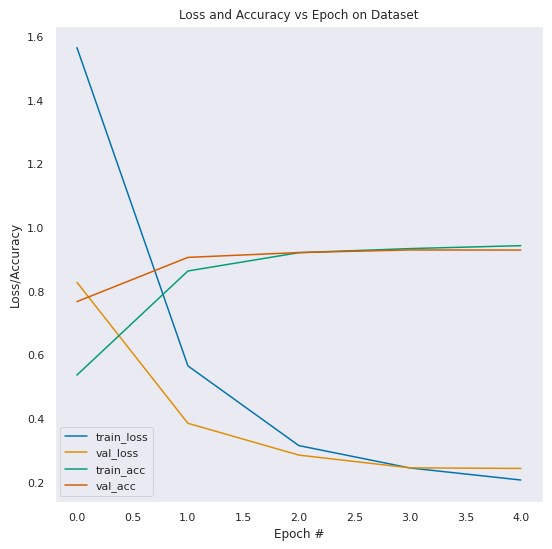

In [ ]:
history_train_val = model4.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

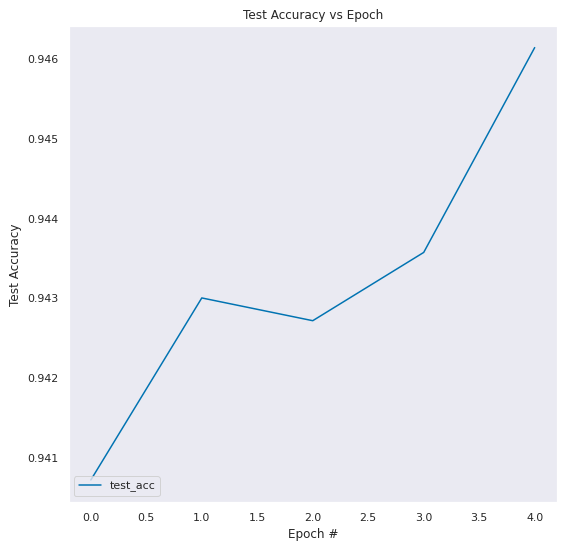

In [ ]:
history_test = model4.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### Model 5

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 0.4738 - acc: 0.8653 - val_loss: 0.2340 - val_acc: 0.9325
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 0.1985 - acc: 0.9396 - val_loss: 0.1804 - val_acc: 0.9463
Epoch 3/5
443/443 [==============================] - 4s 8ms/step - loss: 0.1569 - acc: 0.9525 - val_loss: 0.1730 - val_acc: 0.9481
Epoch 4/5
443/443 [==============================] - 4s 8ms/step - loss: 0.1313 - acc: 0.9598 - val_loss: 0.1464 - val_acc: 0.9560
Epoch 5/5
443/443 [==============================] - 4s 9ms/step - loss: 0.1189 - acc: 0.9630 - val_loss: 0.1752 - val_acc: 0.9465


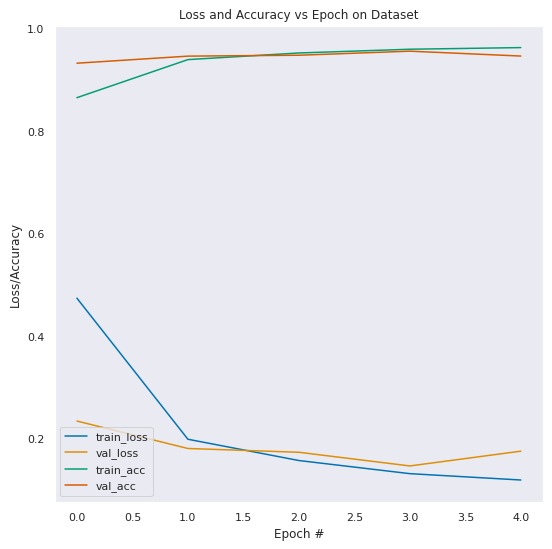

In [ ]:
history_train_val = model5.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

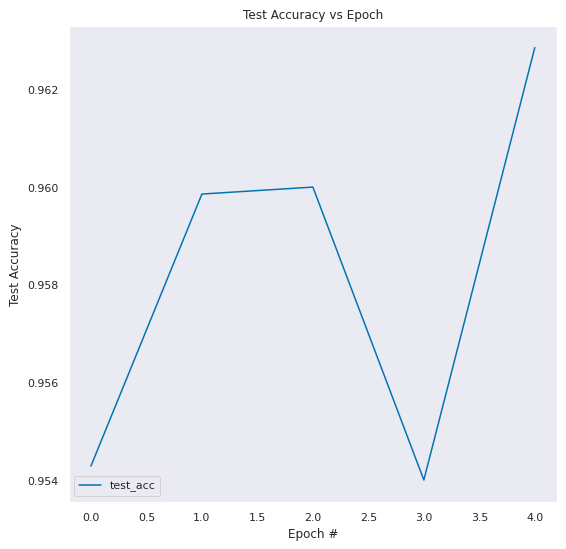

In [ ]:
history_test = model5.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### Model 6

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 0.4740 - acc: 0.8563 - val_loss: 0.2630 - val_acc: 0.9229
Epoch 2/5
443/443 [==============================] - 4s 9ms/step - loss: 0.2130 - acc: 0.9352 - val_loss: 0.2018 - val_acc: 0.9414
Epoch 3/5
443/443 [==============================] - 4s 9ms/step - loss: 0.1696 - acc: 0.9480 - val_loss: 0.1709 - val_acc: 0.9483
Epoch 4/5
443/443 [==============================] - 4s 9ms/step - loss: 0.1435 - acc: 0.9565 - val_loss: 0.1606 - val_acc: 0.9535
Epoch 5/5
443/443 [==============================] - 4s 8ms/step - loss: 0.1232 - acc: 0.9622 - val_loss: 0.1417 - val_acc: 0.9559


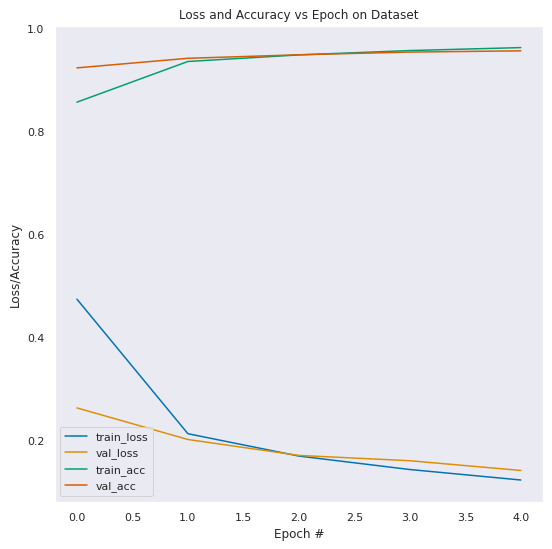

In [ ]:
history_train_val = model6.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

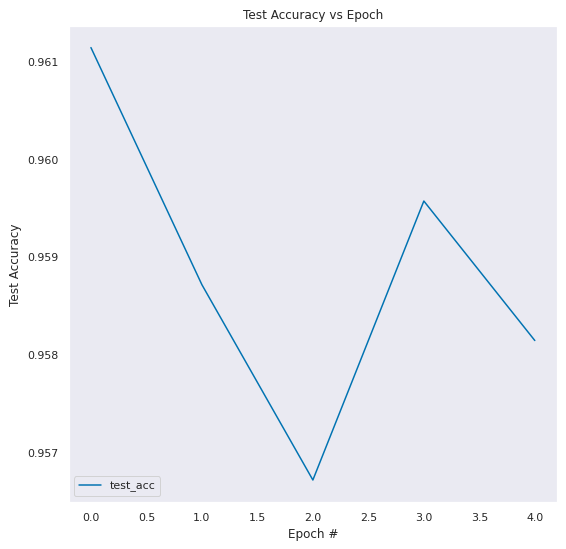

In [ ]:
history_test = model6.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### Model 7

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 2.3155 - acc: 0.1126 - val_loss: 2.3020 - val_acc: 0.1113
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 2.3011 - acc: 0.1134 - val_loss: 2.3022 - val_acc: 0.1113
Epoch 3/5
443/443 [==============================] - 4s 9ms/step - loss: 2.3011 - acc: 0.1134 - val_loss: 2.3020 - val_acc: 0.1113
Epoch 4/5
443/443 [==============================] - 4s 9ms/step - loss: 2.3010 - acc: 0.1134 - val_loss: 2.3021 - val_acc: 0.1113
Epoch 5/5
443/443 [==============================] - 4s 8ms/step - loss: 2.3010 - acc: 0.1134 - val_loss: 2.3022 - val_acc: 0.1113


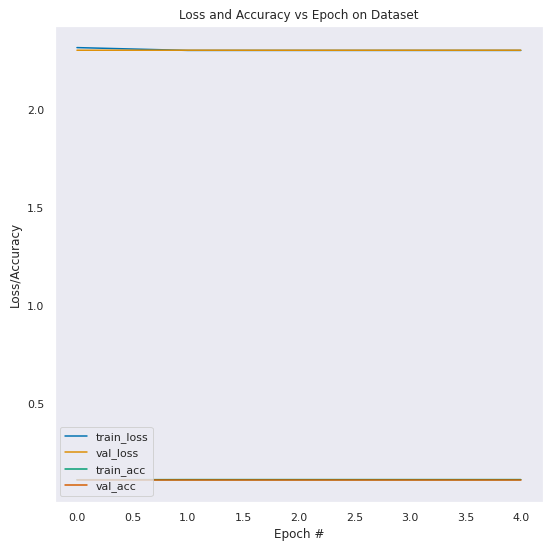

In [ ]:
history_train_val = model7.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

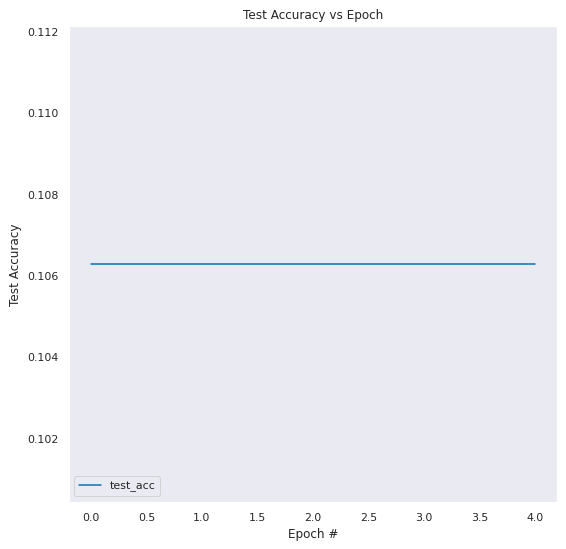

In [ ]:
history_test = model7.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### Model 8

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 2.3095 - acc: 0.1126 - val_loss: 2.3023 - val_acc: 0.1113
Epoch 2/5
443/443 [==============================] - 4s 9ms/step - loss: 2.3011 - acc: 0.1134 - val_loss: 2.3022 - val_acc: 0.1113
Epoch 3/5
443/443 [==============================] - 4s 8ms/step - loss: 2.3011 - acc: 0.1134 - val_loss: 2.3022 - val_acc: 0.1113
Epoch 4/5
443/443 [==============================] - 4s 8ms/step - loss: 2.3010 - acc: 0.1134 - val_loss: 2.3021 - val_acc: 0.1113
Epoch 5/5
443/443 [==============================] - 4s 8ms/step - loss: 2.3010 - acc: 0.1134 - val_loss: 2.3021 - val_acc: 0.1113


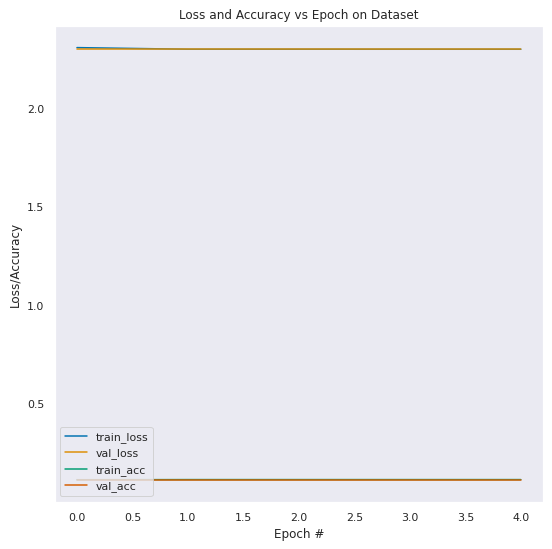

In [ ]:
history_train_val = model8.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

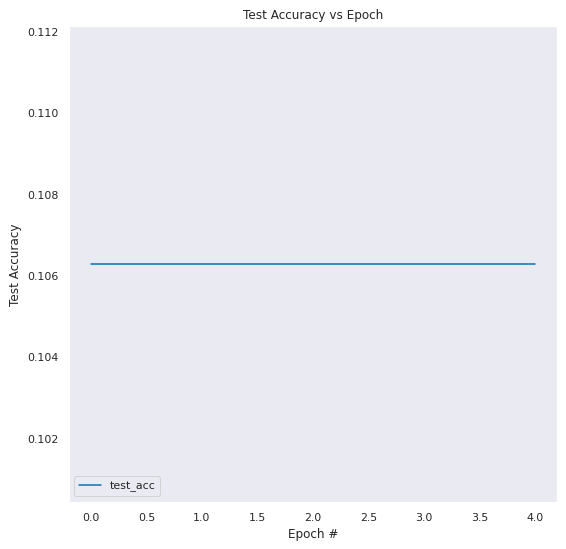

In [ ]:
history_test = model8.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### Model 9

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 2.1652 - acc: 0.1714 - val_loss: 1.9039 - val_acc: 0.2911
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 1.9624 - acc: 0.2368 - val_loss: 1.6804 - val_acc: 0.4249
Epoch 3/5
443/443 [==============================] - 4s 8ms/step - loss: 1.8859 - acc: 0.2710 - val_loss: 1.6364 - val_acc: 0.4238
Epoch 4/5
443/443 [==============================] - 4s 9ms/step - loss: 1.8562 - acc: 0.2885 - val_loss: 1.5261 - val_acc: 0.4979
Epoch 5/5
443/443 [==============================] - 4s 8ms/step - loss: 1.8208 - acc: 0.3066 - val_loss: 1.5152 - val_acc: 0.4783


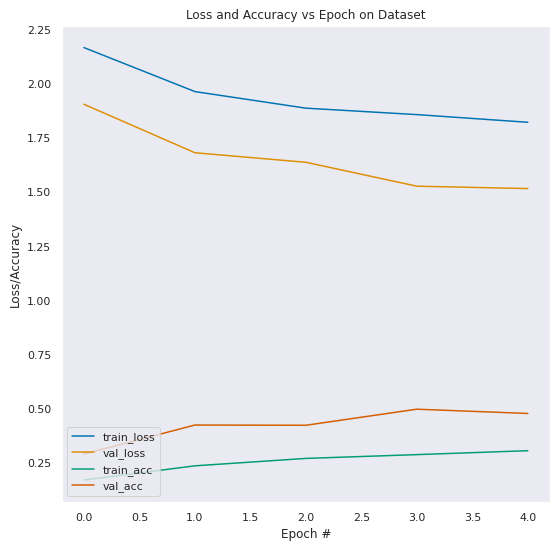

In [ ]:
history_train_val = model9.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

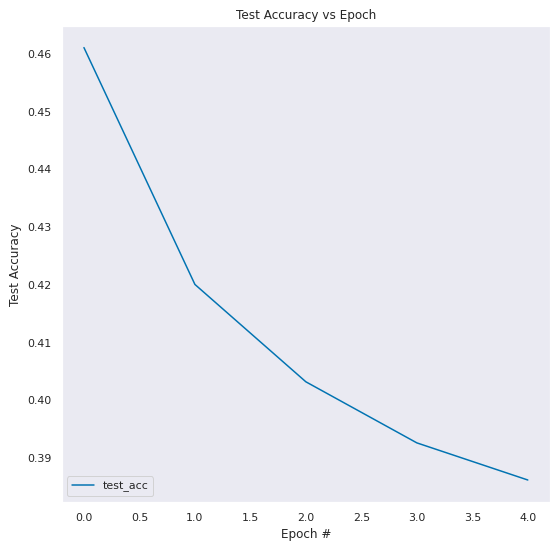

In [ ]:
history_test = model9.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### Model 10

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 1.2610 - acc: 0.5738 - val_loss: 0.4465 - val_acc: 0.8940
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 0.8049 - acc: 0.7357 - val_loss: 0.3585 - val_acc: 0.9160
Epoch 3/5
443/443 [==============================] - 4s 8ms/step - loss: 0.6775 - acc: 0.7839 - val_loss: 0.3117 - val_acc: 0.9197
Epoch 4/5
443/443 [==============================] - 4s 9ms/step - loss: 0.6117 - acc: 0.8081 - val_loss: 0.3150 - val_acc: 0.9208
Epoch 5/5
443/443 [==============================] - 4s 9ms/step - loss: 0.5846 - acc: 0.8174 - val_loss: 0.2701 - val_acc: 0.9327


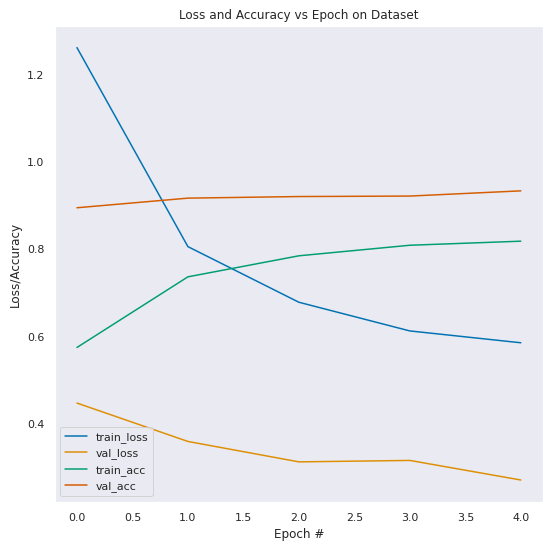

In [ ]:
history_train_val = model10.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

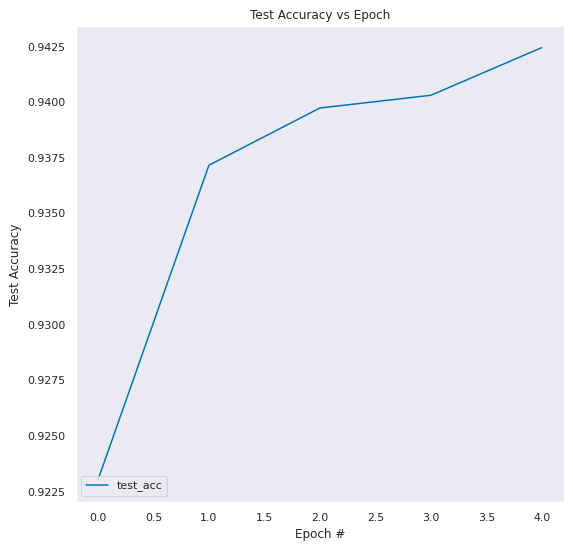

In [ ]:
history_test = model10.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### Model 11

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 0.7880 - acc: 0.7376 - val_loss: 0.2857 - val_acc: 0.9148
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 0.3931 - acc: 0.8774 - val_loss: 0.2108 - val_acc: 0.9365
Epoch 3/5
443/443 [==============================] - 4s 9ms/step - loss: 0.3189 - acc: 0.9003 - val_loss: 0.2021 - val_acc: 0.9398
Epoch 4/5
443/443 [==============================] - 4s 8ms/step - loss: 0.2833 - acc: 0.9125 - val_loss: 0.1981 - val_acc: 0.9402
Epoch 5/5
443/443 [==============================] - 4s 8ms/step - loss: 0.2583 - acc: 0.9197 - val_loss: 0.1748 - val_acc: 0.9476


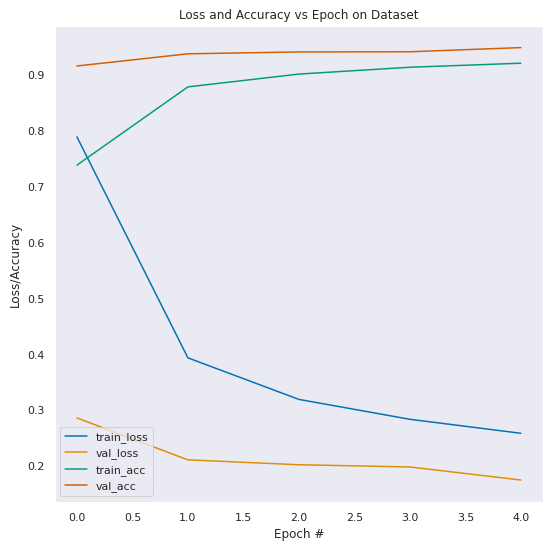

In [ ]:
history_train_val = model11.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

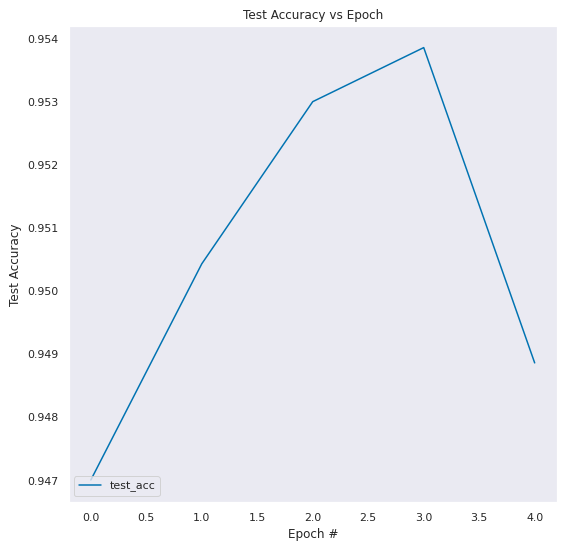

In [ ]:
history_test = model11.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

## Choose the best model from all the above results

Clearly ```Model11``` is the best based on accuracy.

```python
model11 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model11.compile(
    optimizer = keras.optimizers.Adam(),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model11.summary())

history_train_val = model11.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

history_test = model11.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)
```

## Vary the LR for Adam optimiser 


### LR = 0.01

In [ ]:
model12 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model12.compile(
    optimizer = keras.optimizers.Adam(0.01),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model12.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_11 ( (None, 1024)              803841    
_________________________________________________________________
dense_41 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
activation_41 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_42 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_16 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_42 (Activation)   (None, 32)              

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 1.3303 - acc: 0.5053 - val_loss: 0.9806 - val_acc: 0.6129
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 1.1209 - acc: 0.6131 - val_loss: 0.8643 - val_acc: 0.7156
Epoch 3/5
443/443 [==============================] - 4s 8ms/step - loss: 1.0495 - acc: 0.6587 - val_loss: 0.8131 - val_acc: 0.7394
Epoch 4/5
443/443 [==============================] - 4s 8ms/step - loss: 0.9878 - acc: 0.6854 - val_loss: 0.8368 - val_acc: 0.7448
Epoch 5/5
443/443 [==============================] - 4s 9ms/step - loss: 0.9635 - acc: 0.6995 - val_loss: 0.7160 - val_acc: 0.7911


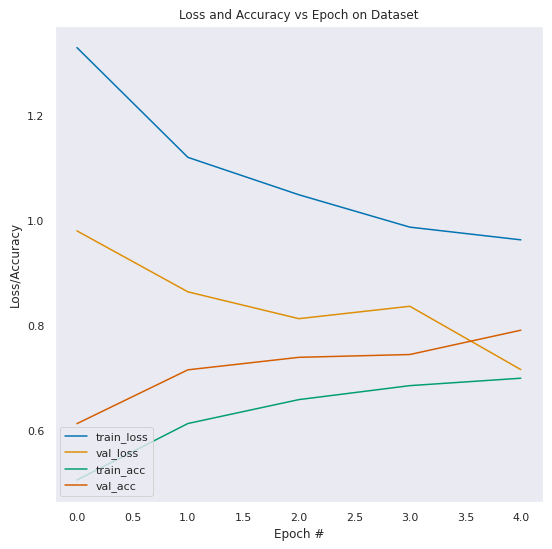

In [ ]:
history_train_val = model12.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

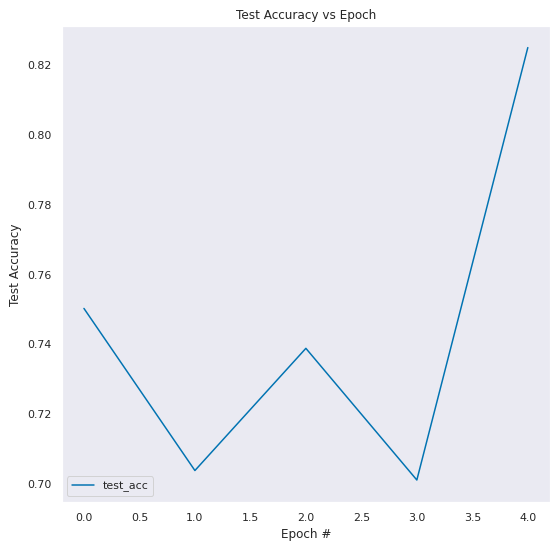

In [ ]:
history_test = model12.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### LR = 0.001

In [ ]:
model13 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model13.compile(
    optimizer = keras.optimizers.Adam(0.001),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model13.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_12 ( (None, 1024)              803841    
_________________________________________________________________
dense_45 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
_________________________________________________________________
activation_45 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_46 (Activation)   (None, 32)              

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 0.7229 - acc: 0.7620 - val_loss: 0.2743 - val_acc: 0.9197
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 0.3622 - acc: 0.8884 - val_loss: 0.2255 - val_acc: 0.9310
Epoch 3/5
443/443 [==============================] - 4s 8ms/step - loss: 0.2983 - acc: 0.9096 - val_loss: 0.2009 - val_acc: 0.9387
Epoch 4/5
443/443 [==============================] - 4s 9ms/step - loss: 0.2671 - acc: 0.9195 - val_loss: 0.1742 - val_acc: 0.9454
Epoch 5/5
443/443 [==============================] - 4s 9ms/step - loss: 0.2470 - acc: 0.9253 - val_loss: 0.1775 - val_acc: 0.9446


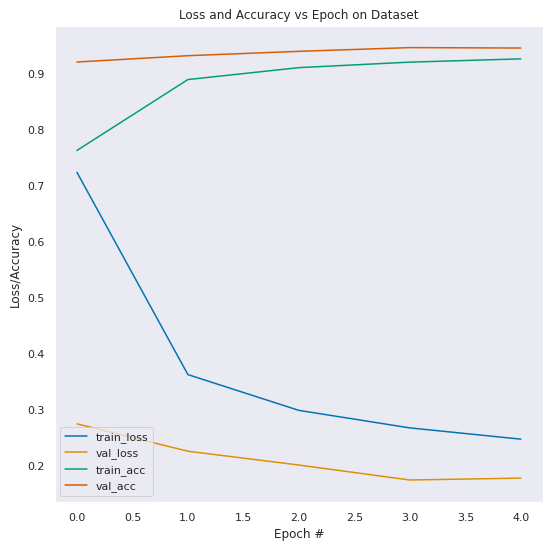

In [ ]:
history_train_val = model13.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

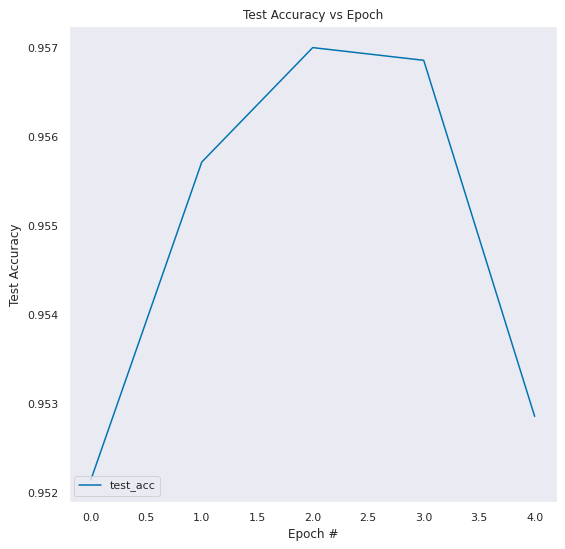

In [ ]:
history_test = model13.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### LR = 0.005

In [ ]:
model14 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model14.compile(
    optimizer = keras.optimizers.Adam(0.005),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model14.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_13 ( (None, 1024)              803841    
_________________________________________________________________
dense_49 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_21 (Dropout)         (None, 16)                0         
_________________________________________________________________
activation_49 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_22 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_50 (Activation)   (None, 32)              

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 0.8005 - acc: 0.7264 - val_loss: 0.3454 - val_acc: 0.8995
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 0.5331 - acc: 0.8279 - val_loss: 0.3400 - val_acc: 0.8983
Epoch 3/5
443/443 [==============================] - 4s 9ms/step - loss: 0.4766 - acc: 0.8486 - val_loss: 0.3017 - val_acc: 0.9108
Epoch 4/5
443/443 [==============================] - 4s 9ms/step - loss: 0.4503 - acc: 0.8583 - val_loss: 0.2974 - val_acc: 0.9122
Epoch 5/5
443/443 [==============================] - 4s 9ms/step - loss: 0.4261 - acc: 0.8651 - val_loss: 0.2662 - val_acc: 0.9206


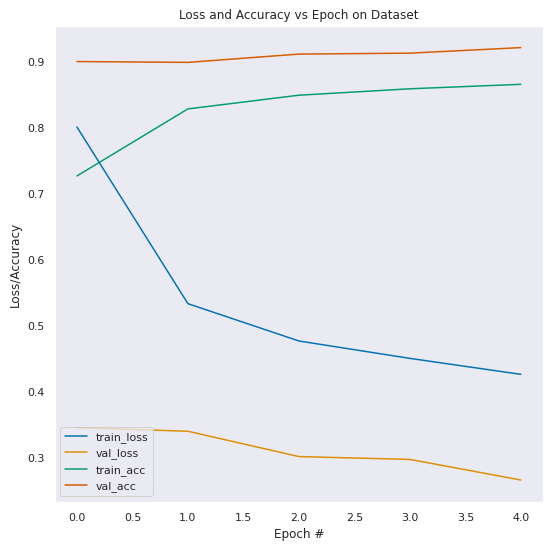

In [ ]:
history_train_val = model14.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

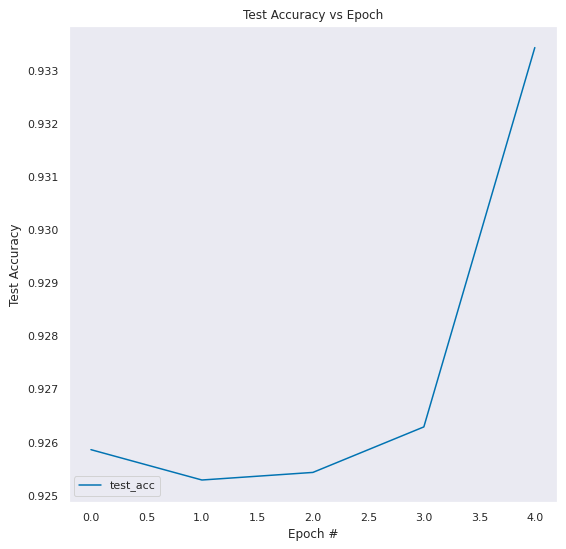

In [ ]:
history_test = model14.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### LR = 0.0001

In [ ]:
model15 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model15.compile(
    optimizer = keras.optimizers.Adam(0.0001),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model15.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_14 ( (None, 1024)              803841    
_________________________________________________________________
dense_53 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_24 (Dropout)         (None, 16)                0         
_________________________________________________________________
activation_53 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_25 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_54 (Activation)   (None, 32)              

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 1.7368 - acc: 0.3940 - val_loss: 0.9517 - val_acc: 0.7449
Epoch 2/5
443/443 [==============================] - 4s 8ms/step - loss: 0.9167 - acc: 0.6984 - val_loss: 0.5124 - val_acc: 0.8581
Epoch 3/5
443/443 [==============================] - 4s 8ms/step - loss: 0.6769 - acc: 0.7823 - val_loss: 0.3985 - val_acc: 0.8859
Epoch 4/5
443/443 [==============================] - 4s 8ms/step - loss: 0.5782 - acc: 0.8181 - val_loss: 0.3482 - val_acc: 0.8970
Epoch 5/5
443/443 [==============================] - 4s 8ms/step - loss: 0.5172 - acc: 0.8395 - val_loss: 0.3097 - val_acc: 0.9081


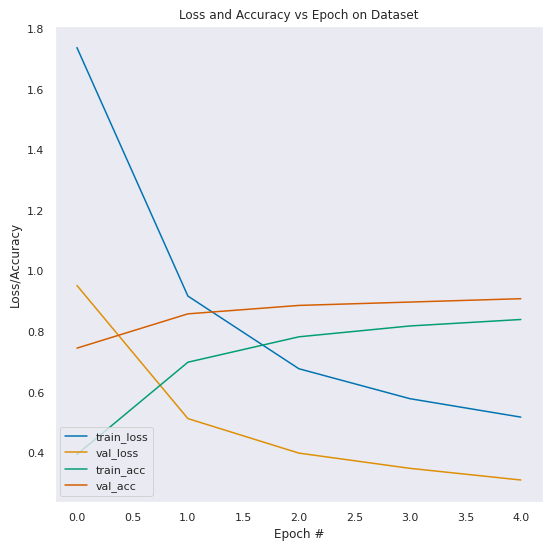

In [ ]:
history_train_val = model15.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

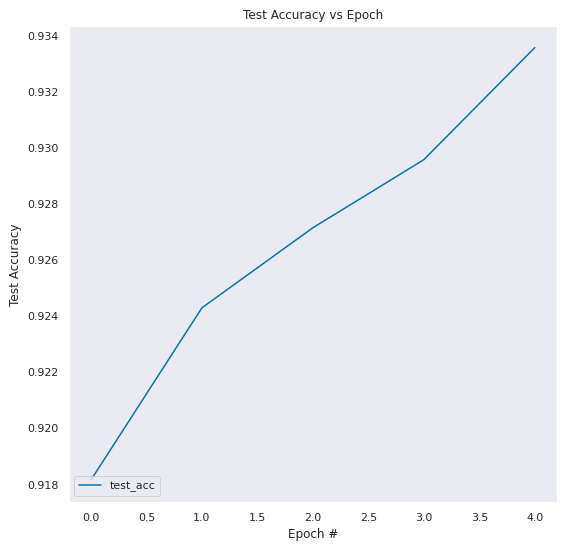

In [ ]:
history_test = model15.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

### LR = 0.0005

In [ ]:
model16 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model16.compile(
    optimizer = keras.optimizers.Adam(0.0005),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model16.summary())

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_fourier_features_15 ( (None, 1024)              803841    
_________________________________________________________________
dense_57 (Dense)             (None, 16)                16400     
_________________________________________________________________
dropout_27 (Dropout)         (None, 16)                0         
_________________________________________________________________
activation_57 (Activation)   (None, 16)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_28 (Dropout)         (None, 32)                0         
_________________________________________________________________
activation_58 (Activation)   (None, 32)              

Epoch 1/5
443/443 [==============================] - 4s 9ms/step - loss: 0.9175 - acc: 0.6975 - val_loss: 0.3213 - val_acc: 0.9025
Epoch 2/5
443/443 [==============================] - 4s 9ms/step - loss: 0.4301 - acc: 0.8655 - val_loss: 0.2546 - val_acc: 0.9216
Epoch 3/5
443/443 [==============================] - 4s 8ms/step - loss: 0.3515 - acc: 0.8908 - val_loss: 0.2089 - val_acc: 0.9368
Epoch 4/5
443/443 [==============================] - 4s 8ms/step - loss: 0.3074 - acc: 0.9060 - val_loss: 0.1996 - val_acc: 0.9368
Epoch 5/5
443/443 [==============================] - 4s 8ms/step - loss: 0.2815 - acc: 0.9128 - val_loss: 0.1873 - val_acc: 0.9429


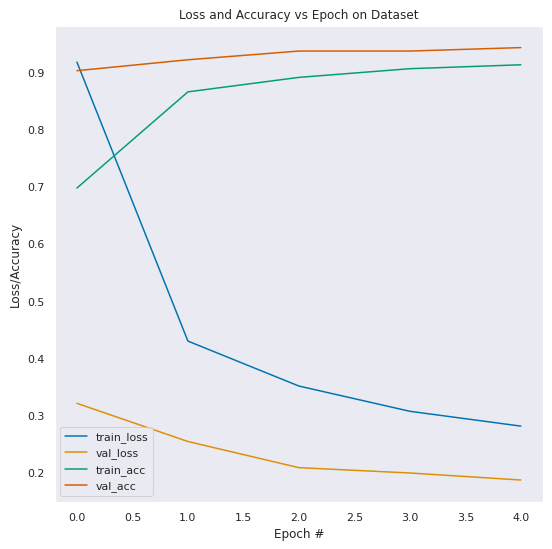

In [ ]:
history_train_val = model16.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

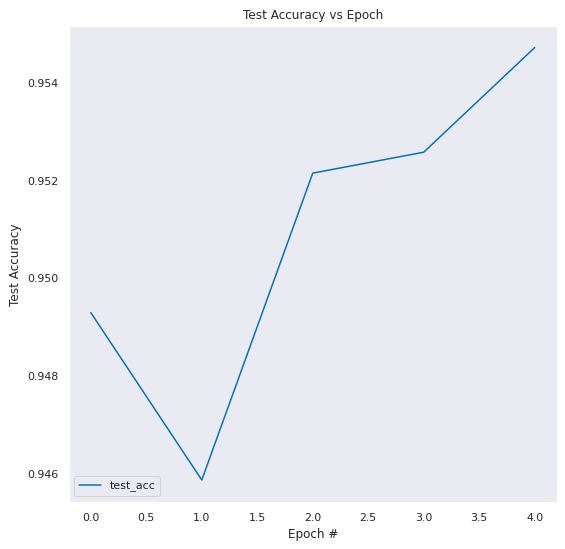

In [ ]:
history_test = model16.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)

## Choosing the best LR from all above results

Clealrly LR = 0.001 gives the highest accuracy values.
And, model 11 was already shown previously to be having the best set of hyper-parameters. Model 13 combines these 2 conclusions, and is thus the best model.


```python
model13 = keras.Sequential(
    [
        keras.Input(shape=(784,)),
        RandomFourierFeatures(
            output_dim=1024, scale=10.0, kernel_initializer="gaussian"
        ),
        layers.Dense(16),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(32),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(64),
        layers.Dropout(0.1),
        layers.Activation('relu'),
        layers.Dense(10),
        layers.Activation('softmax')
    ]
)
model13.compile(
    optimizer = keras.optimizers.Adam(0.001),
    loss      = keras.losses.CategoricalCrossentropy(),
    metrics   = [keras.metrics.CategoricalAccuracy(name="acc")],
)
print(model13.summary())

history_train_val = model13.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.1)
plot_history(history_train_val)

history_test = model13.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test), verbose=0)
plot_test(history_test)
```

In [ ]:
file_path = '/content/drive/My Drive/ML_LAB/Assign_5/' 
weights_path = file_path + 'best_model.h5'
models_path = file_path + 'best_model.json'

In [ ]:
model13.save(weights_path)

In [ ]:
model_json = model13.to_json()
with open(models_path, "w") as json_file:
    json_file.write(model_json)

# Inference

## Running Inference on 5 images from testing set 

In [ ]:
def test_inference(id, model):
  img = x_test[id]
  img = img.reshape((1,784))
  img_class = model.predict_classes(img)
  classname = img_class[0]
  img = img.reshape((28,28))
  plt.imshow(img, cmap="gray")
  plt.title(classname)
  plt.show()

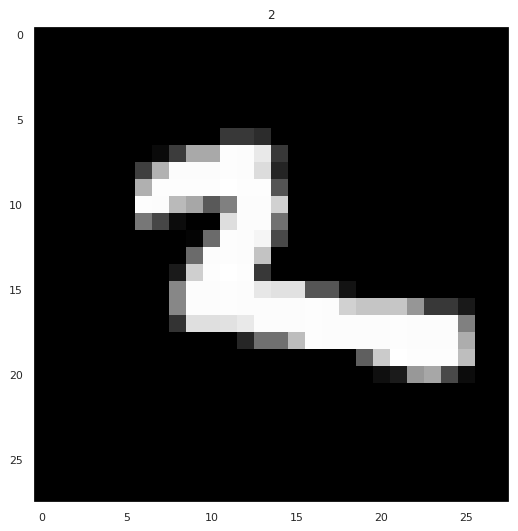

In [ ]:
test_inference(130, model13)

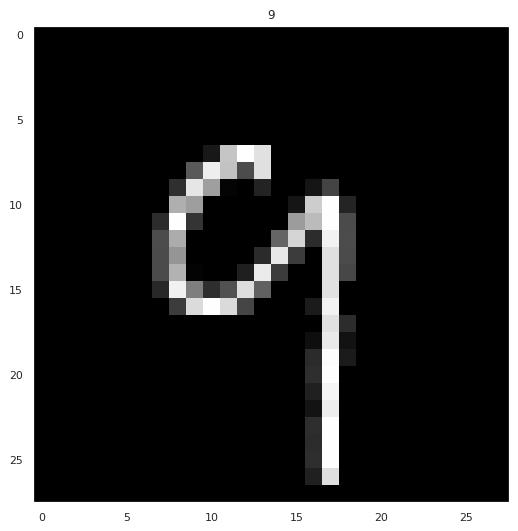

In [ ]:
test_inference(65, model13)

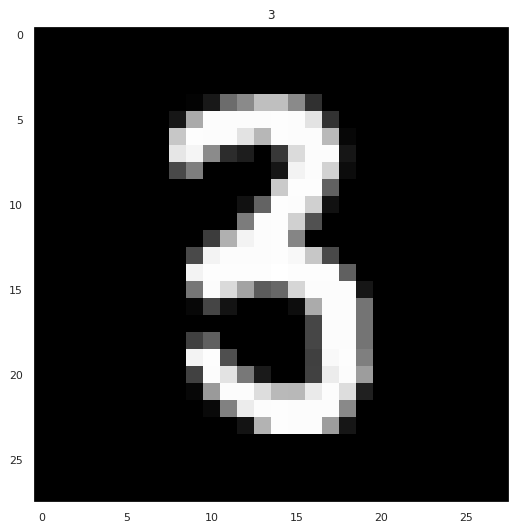

In [ ]:
test_inference(20, model13)

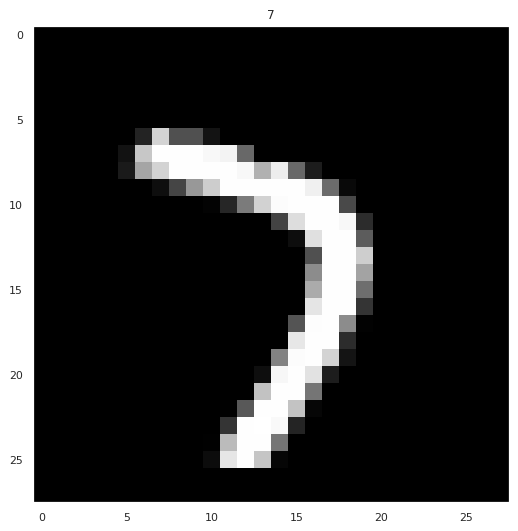

In [ ]:
test_inference(45, model13)

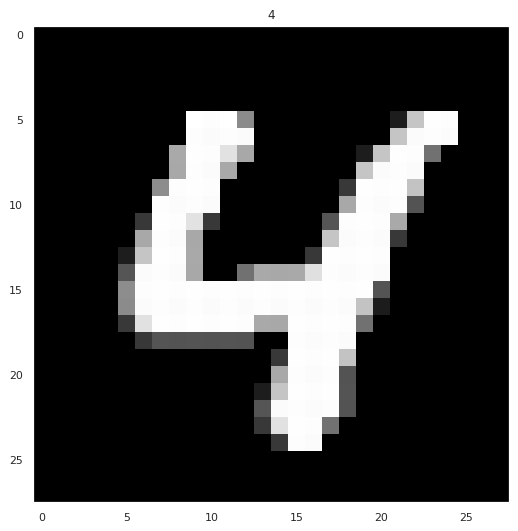

In [ ]:
test_inference(23, model13)

## Inference on 5 of my hand-written images

- without using any pre-processing

In [ ]:
def load_image(path): 
    img = cv2.imread(path)
    plt.imshow(img)
    return img

In [ ]:
def inference(model, img):
  img_size = (28,28)
  img = np.array(img)
  img = cv2.resize(img, img_size)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  test_img = img.reshape((1,784))
  img_class = model.predict_classes(test_img)
  prediction = img_class[0]
  classname = img_class[0]
  img = img.reshape((28,28))
  plt.imshow(img, cmap="gray")
  plt.title(classname)
  plt.show()

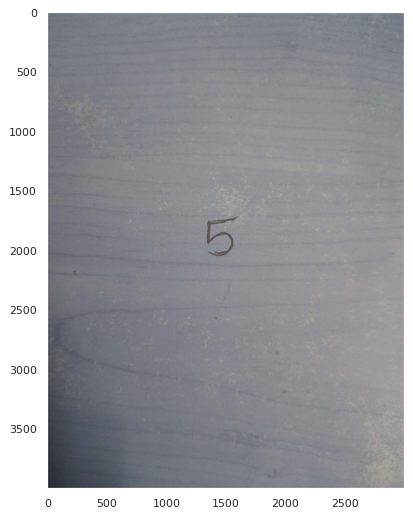

In [ ]:
path = file_path + 'img1.jpg'
img1 = load_image(path)

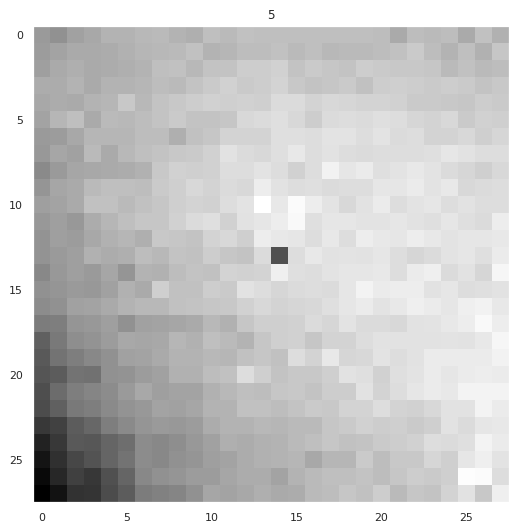

In [ ]:
inference(model13, img1)

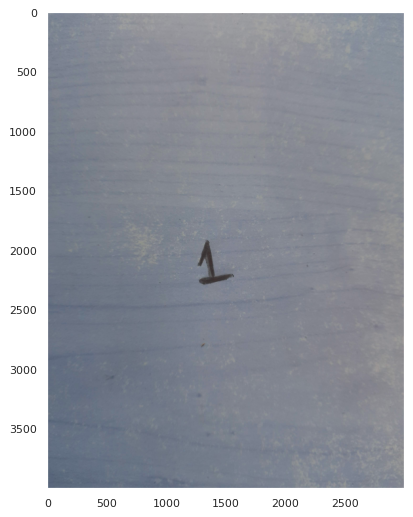

In [ ]:
path = file_path + 'img2.jpg'
img2 = load_image(path)

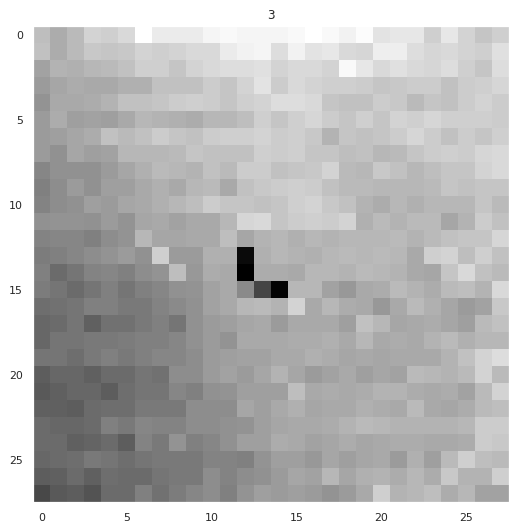

In [ ]:
inference(model13, img2)

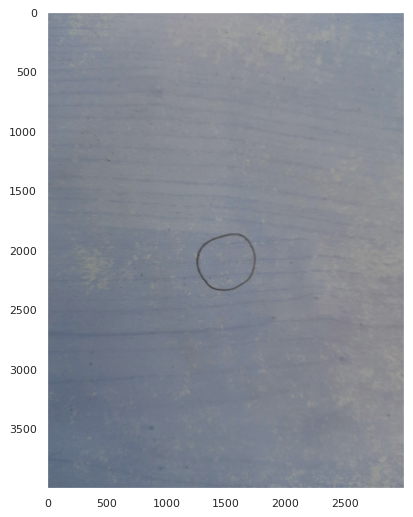

In [ ]:
path = file_path + 'img3.jpg'
img3 = load_image(path)

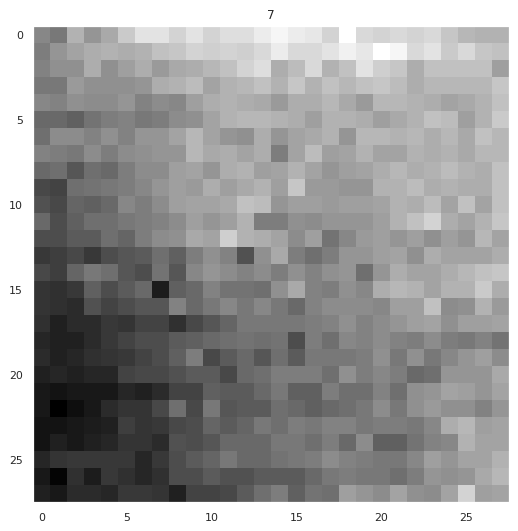

In [ ]:
inference(model13, img3)

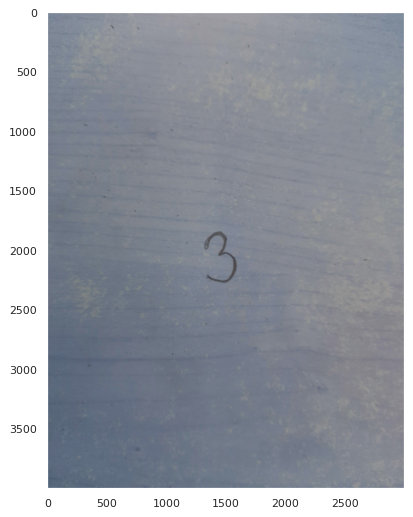

In [ ]:
path = file_path + 'img4.jpg'
img4 = load_image(path)

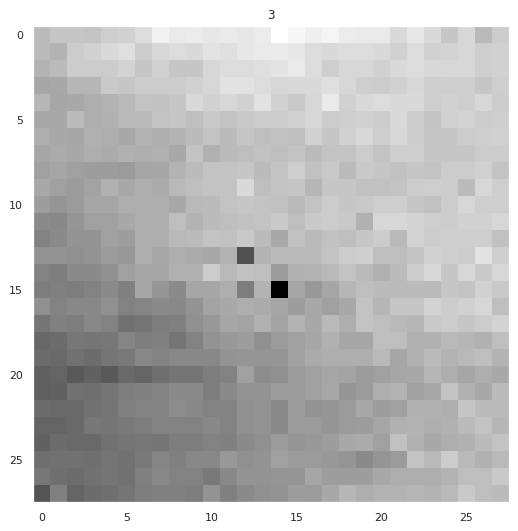

In [ ]:
inference(model13, img4)

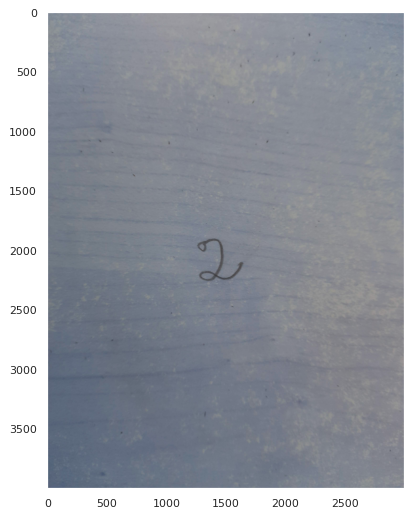

In [ ]:
path = file_path + 'img5.jpg'
img5 = load_image(path)

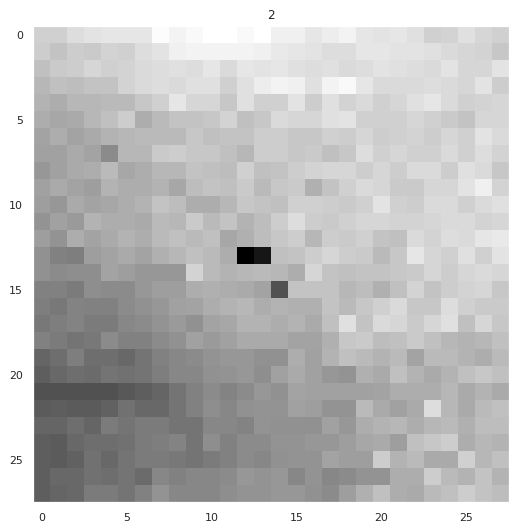

In [ ]:
inference(model13, img5)

## Running Inference on a single image having multiple handwritten digits

- Using pre-processing (thresholding, padding)




----------------Contoured Image--------------------


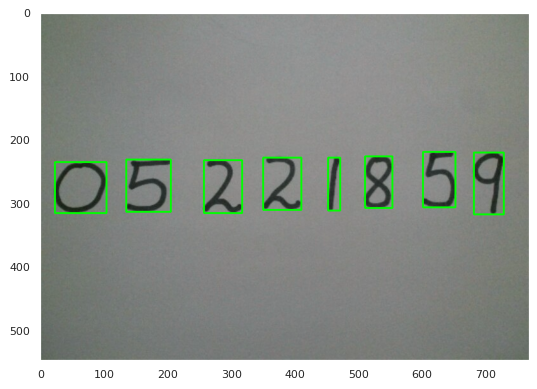

In [ ]:
path = file_path + 'handwritten.jpeg'
image = cv2.imread(path)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
preprocessed_digits = []
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------




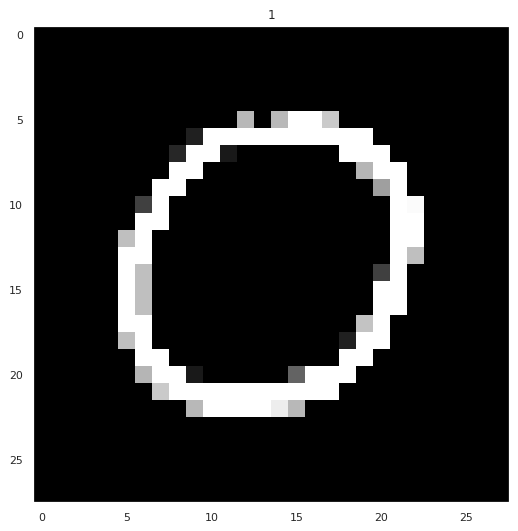



---------------------------------------




---------------------------------------




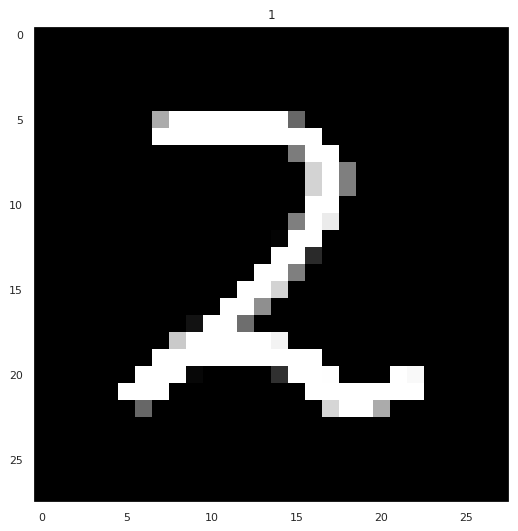



---------------------------------------




---------------------------------------




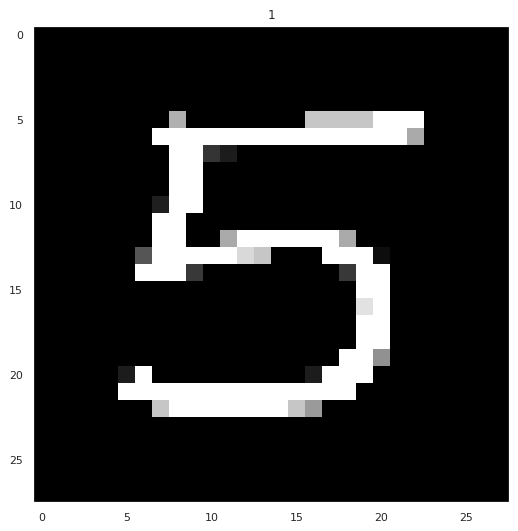



---------------------------------------




---------------------------------------




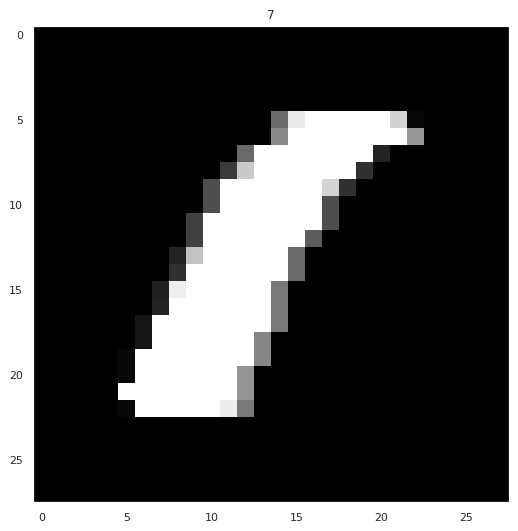



---------------------------------------




---------------------------------------




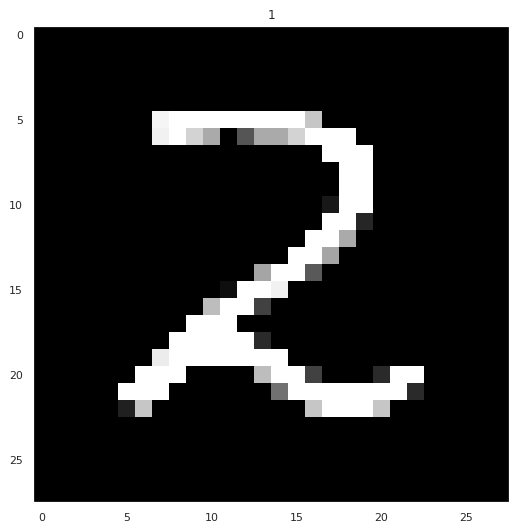



---------------------------------------




---------------------------------------




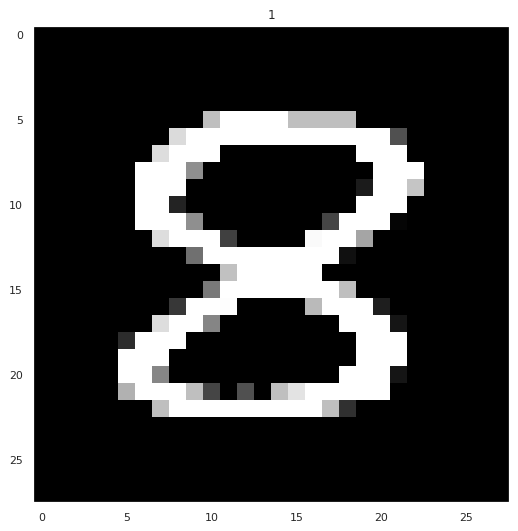



---------------------------------------




---------------------------------------




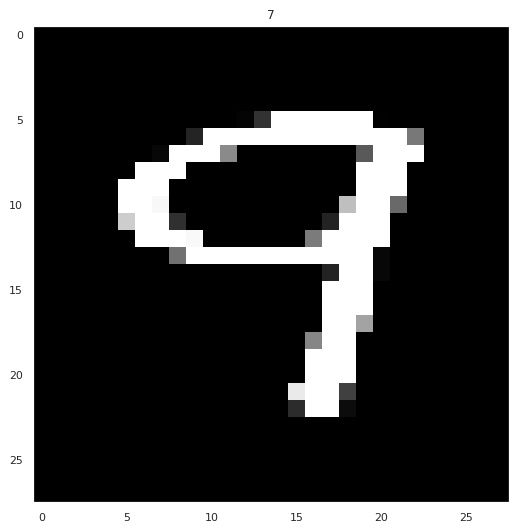



---------------------------------------




---------------------------------------




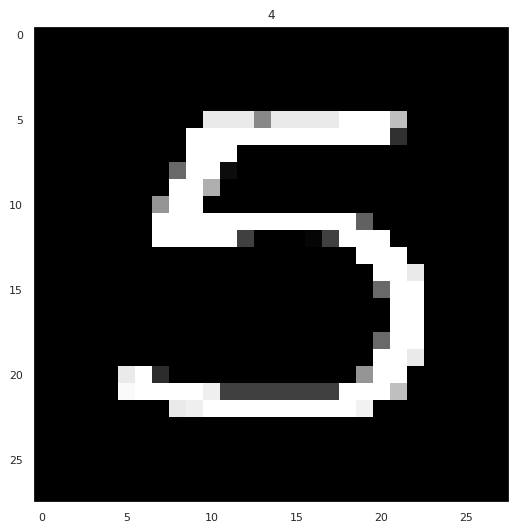



---------------------------------------




In [ ]:
for digit in preprocessed_digits:
    print ("\n\n---------------------------------------\n\n")
    img = digit.reshape(28, 28)
    img = img.reshape((1,784))
    img_class = model13.predict_classes(img)
    classname = img_class[0]
    img = img.reshape((28,28))
    plt.imshow(img, cmap="gray")
    plt.title(classname)
    plt.show()
    print ("\n\n---------------------------------------\n\n")